# End to End Machine learning project

This is the 2nd chapter from the Book "Hands on Machine Learning using ScikitLearn and TensorFlow"

## Project Summary

In this project we will use the California Housing data available at StatLib repository and use it to predict housing prices given other attributes

## Data

In this section we will download the data, load it into python and analyse the data at a high level to get a feel for what the data holds. This includes summarizing the details of the dataset and also ploting some of the things in order to visually understand the data

### Donwloading the data

In [1]:
# Function to download the data from the internet
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    # Check and see if HOUSINGPATH dir needs to be created
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

### Loading the data into Pandas

In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

### Downloading and Reading the data into Python

In [3]:
# Download the data
fetch_housing_data()

# Read the data into python
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Get more details about the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Check value_counts() method
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
# Get the dataset summary
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


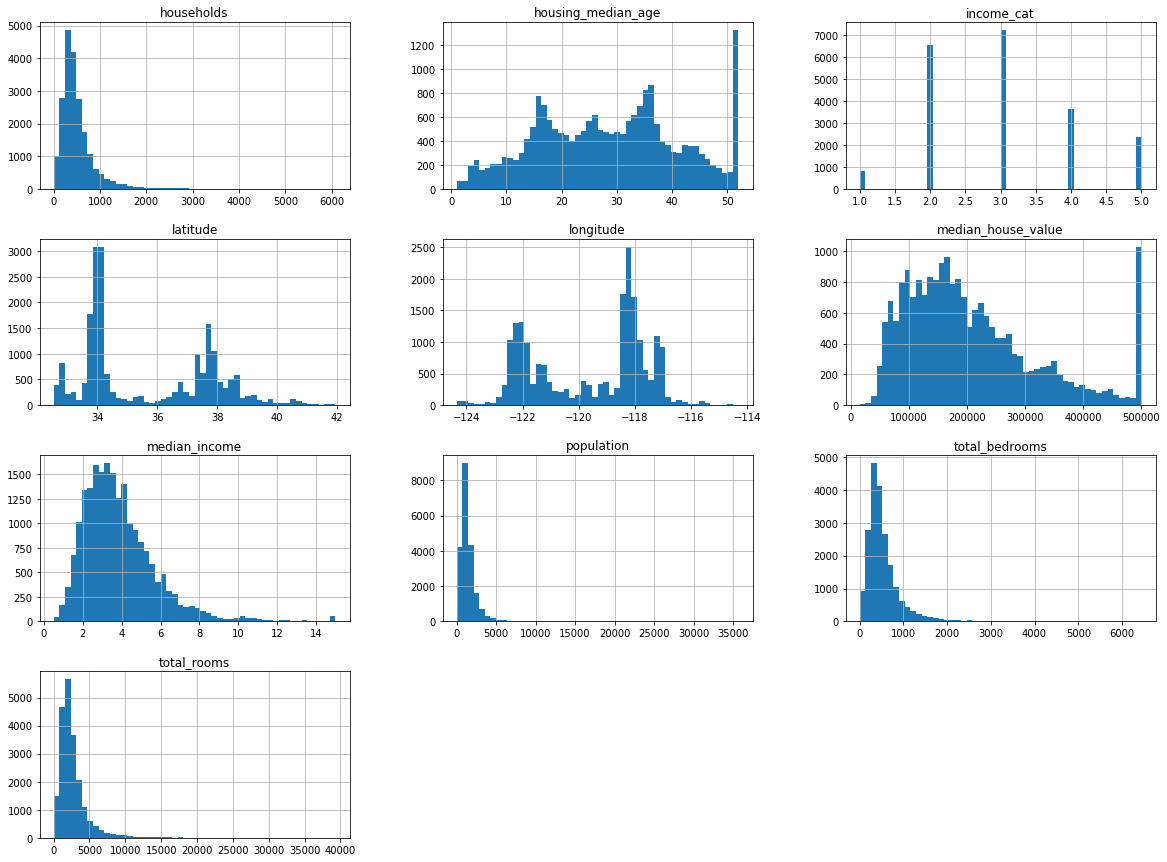

In [21]:
# Get the plot of the summary of each column in the dataset
import matplotlib.pyplot as plt
%matplotlib inline

housing.hist(bins = 50, figsize = [20, 15])
plt.show()

### Create a test dataset

We want to create a test data so that our analysis doesn't get biased as we look at the whole dataset

The **median_income** column is of prime importance as per the "clients" and we need to make sure that the split in test and train features equal contibution of the median income population. We will need to perform a stratified sampling in this case.

First, we will need to categorically divide median_income column. Then use scikit learn's **StratifiedShuffleSplit** function to get our train and test splits.

If we had to get a random sample, we could've used scikit learn's **train_test_split** function as shown below

#### Randomg Split

In [58]:
# Get a random test train split using scikit learn function
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)


# Get value counts
# Check if split worked
value_counts_entire_data = housing["income_cat"].value_counts()/len(housing)
value_counts_test_data = test_set["income_cat"].value_counts()/len(test_set)
value_counts_train_data = train_set["income_cat"].value_counts()/len(train_set)

# Put them in a dataframe to check side by side
sampling_perf = pd.DataFrame({"Entire Data": value_counts_entire_data, 
             "Test Data" : value_counts_test_data,
             "Train Data" : value_counts_train_data,}).sort_index()

# Calculate error 
sampling_perf["% test error"] = (sampling_perf["Test Data"] - sampling_perf["Entire Data"])/sampling_perf["Entire Data"] * 100
sampling_perf["% train error"] = (sampling_perf["Train Data"] - sampling_perf["Entire Data"])/sampling_perf["Entire Data"] * 100
    

sampling_perf

,Entire Data,Test Data,Train Data,% test error,% train error
1.0,0.039826,0.040213,0.039729,0.973236,-0.243309
2.0,0.318847,0.324370,0.317466,1.732260,-0.433065
3.0,0.350581,0.358527,0.348595,2.266446,-0.566611
4.0,0.176308,0.167393,0.178537,-5.056334,1.264084
5.0,0.114438,0.109496,0.115673,-4.318374,1.079594


#### Stratified Sampling

Here we will split test and train based on **median_income**

In [11]:
# Create the income_cat column. Category should only be till 5
import numpy as np

housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace = True)

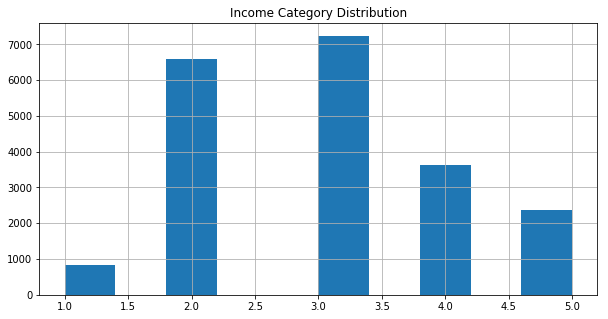

In [19]:
# Plot the housing category
housing["income_cat"].hist(figsize = [10, 5])
plt.title("Income Category Distribution")
plt.show()

In [60]:
# Divide Test and Train data based on income_cat column
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    train_set = housing.iloc[train_index, :]
    test_set = housing.iloc[test_index, :]

In [61]:
# Check if split worked
value_counts_entire_data = housing["income_cat"].value_counts()/len(housing)
value_counts_test_data = test_set["income_cat"].value_counts()/len(test_set)
value_counts_train_data = train_set["income_cat"].value_counts()/len(train_set)

# Put them in a dataframe to check side by side
sampling_perf = pd.DataFrame({"Entire Data": value_counts_entire_data, 
             "Test Data" : value_counts_test_data,
             "Train Data" : value_counts_train_data,}).sort_index()

# Calculate error 
sampling_perf["% test error"] = (sampling_perf["Test Data"] - sampling_perf["Entire Data"])/sampling_perf["Entire Data"] * 100
sampling_perf["% train error"] = (sampling_perf["Train Data"] - sampling_perf["Entire Data"])/sampling_perf["Entire Data"] * 100
     

sampling_perf

,Entire Data,Test Data,Train Data,% test error,% train error
1.0,0.039826,0.039729,0.039850,-0.243309,0.060827
2.0,0.318847,0.318798,0.318859,-0.015195,0.003799
3.0,0.350581,0.350533,0.350594,-0.013820,0.003455
4.0,0.176308,0.176357,0.176296,0.027480,-0.006870
5.0,0.114438,0.114583,0.114402,0.127011,-0.031753


As we can see from the comparison that the Stratified sampling does a way better job at representing population of different income groups in the test and train data. We will now remove the **income_cat** variable from the data to bring it back to its original format